### Practical 1: Basic Image Classification with Convolutional Neural Network (CNN)
##### Course: Computer Vision
##### Objective: Build, train and evaluate a simple CNN from scratch on CIFAR-10
##### Tools: TensorFlow 2.x + Keras
##### Dataset: CIFAR-10 (10 classes, 32×32 colour images)

##### Step 1 IMPORT LIBRARY

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

##### Step 2 LOAD & PREPARE DATASET

In [2]:
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 723s 4us/step 


In [3]:
# Convert class vectors to binary class matrices (one-hot encoding)
# Example: label 3 → [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test,  10)
print(f"Training data shape: {x_train.shape}")   # (50000, 32, 32, 3)
print(f"Test data shape:     {x_test.shape}")    # (10000, 32, 32, 3)

Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)


##### Step 3 DEFINE CLASS NAMES

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

##### Step 4 BUILD SIMPLE CNN MODEL

In [6]:
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
      # Output layer – 10 classes
    layers.Dense(10, activation='softmax')
])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Step 5 COMPILE MODEL

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()   # Print model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

##### Step 6 TRAIN MODEL

In [8]:
print("\nTraining the model...")
history = model.fit(x_train, y_train,
                    epochs=20,               # increase to 30–50 for better results
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)


Training the model...
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 290ms/step - accuracy: 0.5018 - loss: 1.5137 - val_accuracy: 0.2105 - val_loss: 2.8752
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 287ms/step - accuracy: 0.6549 - loss: 0.9831 - val_accuracy: 0.6901 - val_loss: 0.8837
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 296ms/step - accuracy: 0.7092 - loss: 0.8342 - val_accuracy: 0.7141 - val_loss: 0.8365
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 111s 283ms/step - accuracy: 0.7319 - loss: 0.7572 - val_accuracy: 0.7149 - val_loss: 0.8722
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 109s 280ms/step - accuracy: 0.7589 - loss: 0.6824 - val_accuracy: 0.7598 - val_loss: 0.6847
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 119s 305ms/step - accuracy: 0.7810 - loss: 0.6250 - val_accuracy: 0.7585 - val_loss: 0.7077
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 120s 306ms/step - accuracy: 0.7987 - loss: 0.5693 - val_accuracy: 0.7779 - val_loss: 0.6751
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 299ms/st

##### Step 7 EVALUATE ON TEST SET

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")


Test accuracy: 0.8290  (82.90%)


##### Step 8 VISUALIZE TRAINING HISTORY

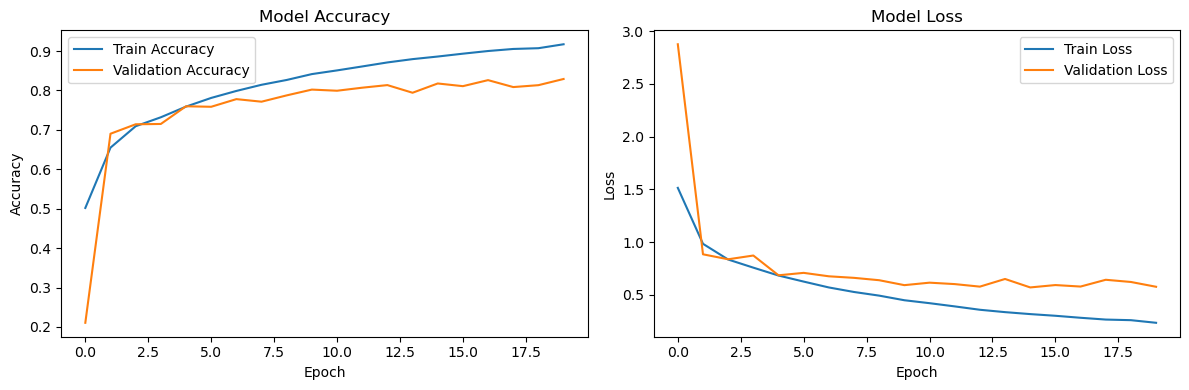

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

##### Step 9 MAKE PREDICTIONS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


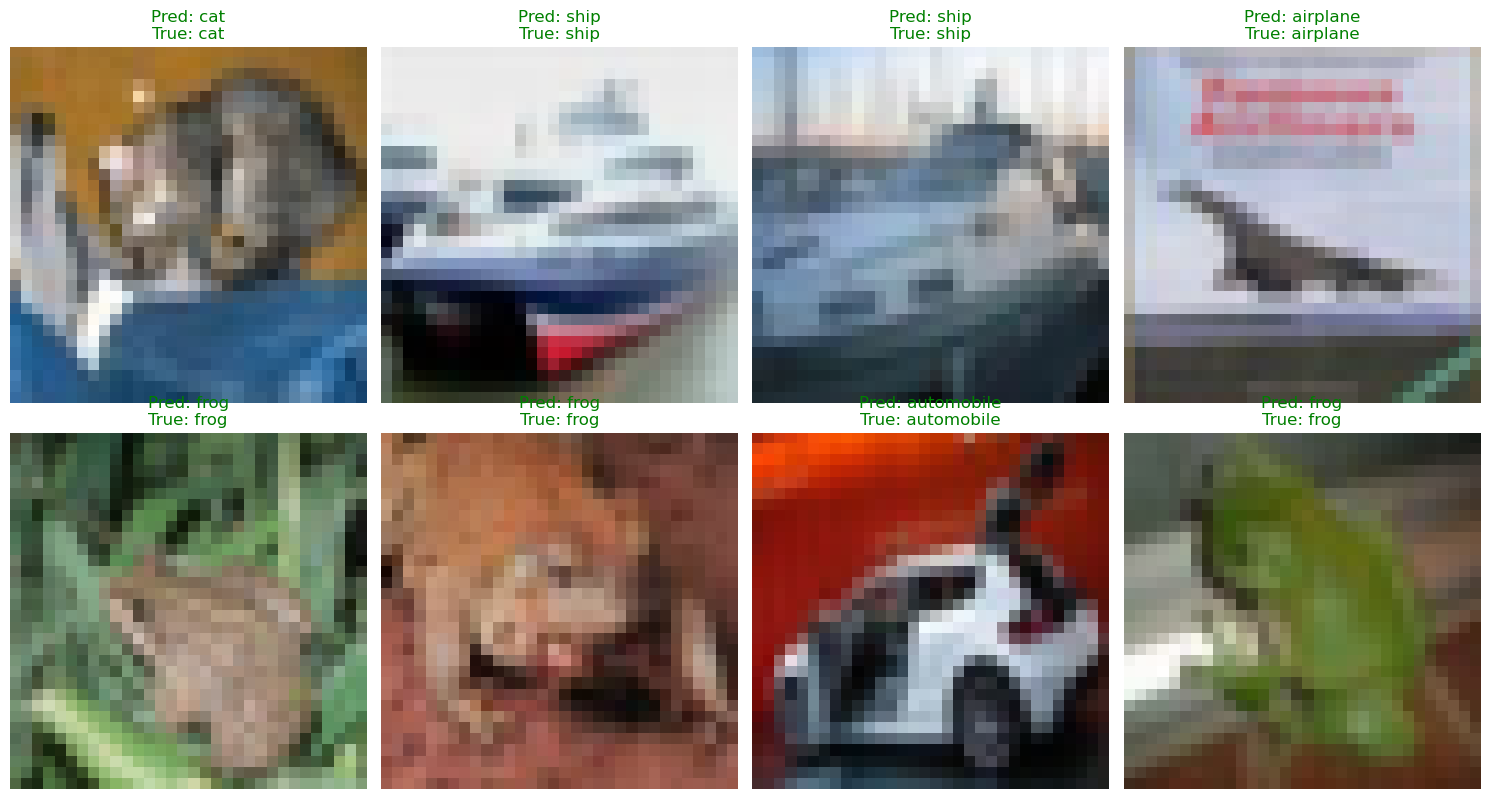

Practical 1 completed.


In [11]:
num_images = 8
predictions = model.predict(x_test[:num_images])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color=("green" if predicted_classes[i] == true_classes[i] else "red"))
    plt.axis('off')
plt.tight_layout()
plt.show()
# Optional: Save the model
# model.save("basic_cifar10_cnn.h5")
print("Practical 1 completed.")